In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [41]:
data = pd.read_csv('D:/datasets/Weather Forecasting/DailyDelhiClimateTrain.csv')
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [42]:
data.shape

(1462, 5)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [44]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [45]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [46]:
figure = px.line(data, x="date", 
                 y="meantemp", 
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

In [47]:
figure = px.line(data, x="date", 
                 y="humidity", 
                 title='Humidity in Delhi Over the Years')
figure.show()

In [48]:
figure = px.line(data, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

Here’s how we can change the data type and extract year and month data from the date column:

In [49]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


Now let’s have a look at the temperature change in Delhi over the years:

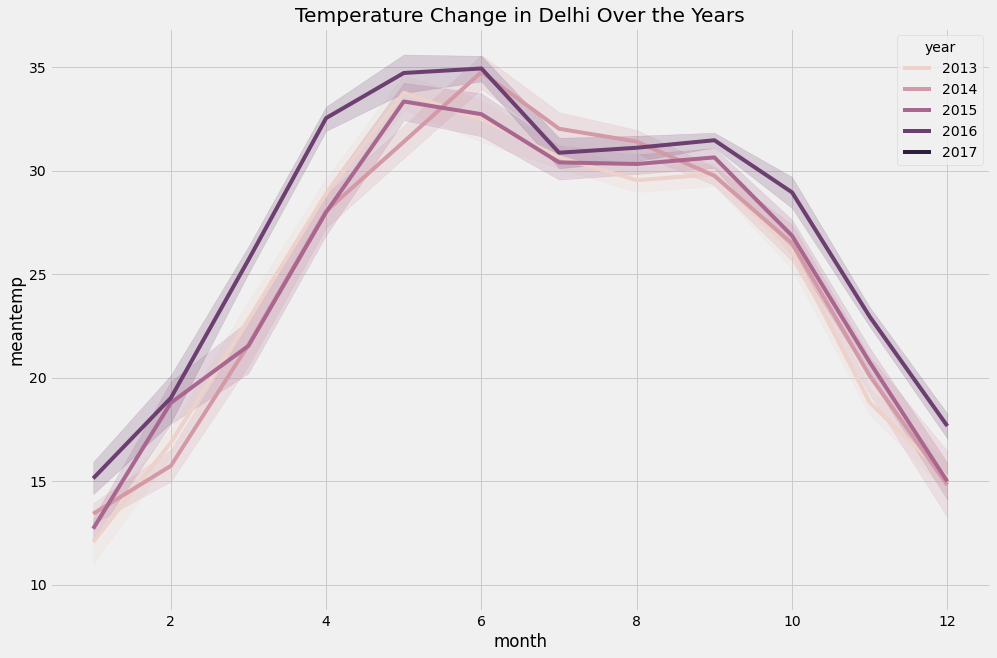

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

Although 2017 was not the hottest year in the summer, we can see a rise in the average temperature of Delhi every year.

In [56]:
# Function to convert our dataset in a time series dataset
def create_window(target, feature, window=1, offset=0):
    feature_new, target_new = [], []
    feature_np = feature.to_numpy()
    target_np = target.to_numpy()
    for i in range(window, target.shape[0] - offset):
        feature_list = feature_np[i - window:i]
        feature_new.append(feature_list.reshape(window, feature_np.shape[1]))
        target_new.append(target_np[i+offset].reshape(1))
    return np.array(feature_new), np.array(target_new)

The function above is simple, but very usefull. With it we can create our time series, varying the size of the window, offset and the feature we want for our new dataset

In [61]:
# scale all the dataset (not including the date)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data.drop(columns='date'))
df_scaled = pd.DataFrame(df_scaled, columns=data.drop(columns='date').columns)

# Set the window to 10
window = 10
feature_columns = ['humidity', 'wind_speed', 'meanpressure', 'meantemp']

# Create a window with all the columns as features (excluding the date)
feature, target = create_window(df_scaled['meantemp'],df_scaled[feature_columns], window=window)
print(feature[0])
print(target[0])
print(df_scaled.head(12))

[[ 1.41543887 -1.49169876  0.02532119 -2.10950001]
 [ 1.86282836 -0.83819598  0.03716186 -2.46345392]
 [ 1.5645687  -0.47562621  0.04197213 -2.49521901]
 [ 0.63002175 -1.2212334   0.03364666 -2.29101484]
 [ 1.55462671 -0.68030269  0.02994645 -2.65404448]
 [ 1.31403058 -1.16714033  0.03827192 -2.51790837]
 [ 1.06349246 -0.11013249  0.04937255 -2.51790837]
 [ 0.17553083  0.07470291  0.04223643 -2.26508415]
 [-0.5679879   1.24950416  0.03272161 -1.56495555]
 [ 0.07327037  0.13109337  0.02532119 -1.9733639 ]]
[-1.33157934]
    meantemp  humidity  wind_speed  meanpressure      year     month
0  -2.109500  1.415439   -1.491699      0.025321 -1.341891 -1.599501
1  -2.463454  1.862828   -0.838196      0.037162 -1.341891 -1.599501
2  -2.495219  1.564569   -0.475626      0.041972 -1.341891 -1.599501
3  -2.291015  0.630022   -1.221233      0.033647 -1.341891 -1.599501
4  -2.654044  1.554627   -0.680303      0.029946 -1.341891 -1.599501
5  -2.517908  1.314031   -1.167140      0.038272 -1.341891 -1

Here we have our first time series, using all the columns and with a window of 10

In [62]:
# Function to create train and test datasets
def train_test(feature, target, perc_train = 0.9):
    size_train = int(len(feature) * perc_train)

    x_train = feature[0:size_train]
    y_train = target[0:size_train]

    x_test = feature[size_train: len(feature)]
    y_test = target[size_train: len(feature)]

    return x_train, x_test, y_train, y_test

Here we have a function to create the train and test dataset. We're using a custom function because we want to separate the dataset without any shuffle, just a clean cut, so we can maintain the temporal characteristic of the data

<AxesSubplot:xlabel='date'>

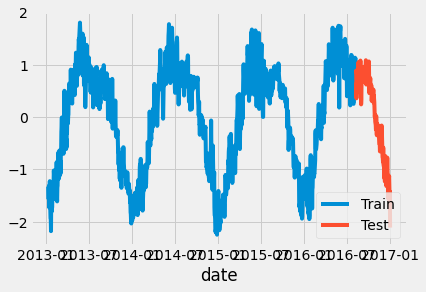

In [64]:
x_train, x_test, y_train, y_test = train_test(feature, target)

# Visualize the train and test data
sns.lineplot(x=data['date'].iloc[window:len(y_train) + window], y=y_train[:,0], label='Train')
sns.lineplot(x=data['date'].iloc[window + len(y_train):], y=y_test[:,0], label='Test')

In [65]:
from tensorflow import keras
from tensorflow import nn

# Create a standard model using LSTM
def model_lstm(x_shape):

    model = keras.Sequential()
    model.add(keras.layers.LSTM(64, input_shape=(x_shape[1], x_shape[2])))
    model.add(keras.layers.Dense(units=1))

    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    return model

We create a simple model because our dataset is not too complex, so a simple neural network will do

And we create this function because we use this same model after

In [66]:
model = model_lstm(x_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17664     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [67]:
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
41/41 [==============================] - 4s 26ms/step - loss: 0.1429 - val_loss: 0.0899
Epoch 2/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0779 - val_loss: 0.0696
Epoch 3/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0705 - val_loss: 0.0758
Epoch 4/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0652 - val_loss: 0.0731
Epoch 5/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0635 - val_loss: 0.0578
Epoch 6/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0597 - val_loss: 0.0560
Epoch 7/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0572 - val_loss: 0.0577
Epoch 8/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0553 - val_loss: 0.0571
Epoch 9/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0545 - val_loss: 0.0596
Epoch 10/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0539 - val_loss: 0.0510
Epoch 11/50
41/41 

In [69]:
# Function to print the results of the fit process
def print_loss(result):
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()
    
# Function to print the y_predicted compared with the y_test
def print_test_x_prediction(y_test, y_predict, df_date, train_size, window=0):
    sns.lineplot(x=df_date.iloc[train_size + window:], y=y_test[:,0], label = 'Test')
    sns.lineplot(x=df_date.iloc[train_size + window:], y=y_predict[:,0], label = 'Predict')
    plt.show()

5/5 [==============================] - 0s 4ms/step


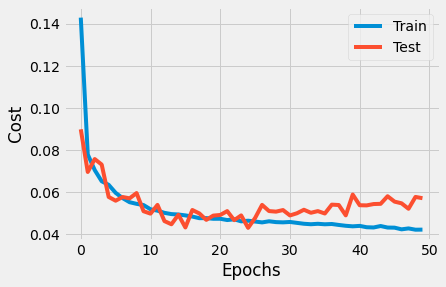

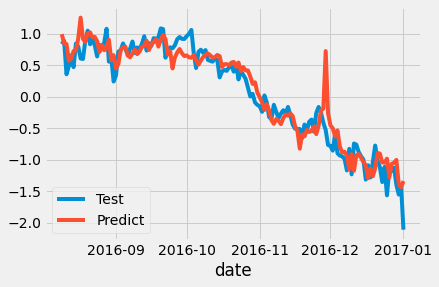

In [71]:
y_predict = model.predict(x_test)

print_loss(result)
print_test_x_prediction(y_test, y_predict, data['date'], len(y_train), window=window)